In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [9]:
tf.test.is_built_with_cuda()

True

In [10]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 198s 1us/step


In [11]:
x_train.shape

(50000, 32, 32, 3)

In [27]:
def plot_image(index):
    plt.figure(figsize=(10,1))
    plt.xlabel(classes[y_train[index][0]])
    plt.imshow(x_train[index])

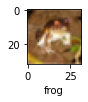

In [28]:
plot_image(0)

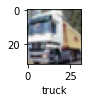

In [29]:
plot_image(1)

In [21]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

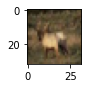

In [22]:
plot_image(3)

In [24]:
classes[y_train[3][0]]

'deer'

In [30]:
x_train_scaled = x_train / 250


In [40]:
x_test_scaled = x_test / 250

# One Hot Encodding

In [31]:
y_train_categorical = keras.utils.to_categorical(
    y_train , num_classes=10, dtype='float32'
)

In [34]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [35]:
y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes=10, dtype='float32'
)

## categorical_crossentropy

Because of one hot encoded if not use for a discret output **sparse_categorical_crossentropy**

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled , y_train_categorical , epochs= 50)

2022-10-29 00:55:27.950292: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 36864000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 67s 40ms/step - loss: 1.8108 - accuracy: 0.3556
Epoch 2/50
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6196 - accuracy: 0.4286
Epoch 3/50
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5415 - accuracy: 0.4572
Epoch 4/50
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4797 - accuracy: 0.4760
Epoch 5/50
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4301 - accuracy: 0.4966
Epoch 6/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3887 - accuracy: 0.5109
Epoch 7/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3484 - accuracy: 0.5254
Epoch 8/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3117 - accuracy: 0.5387
Epoch 9/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2810 - accuracy: 0.5491
Epoch 10/50
1563/1563 [==============================] - 62s 40m

In [41]:
np.argmax(model.predict(x_test_scaled)[1])

313/313 [==============================] - 3s 9ms/step


8